# Final Report

Humaira Halim (hbh4bv@virginia.edu) DS 5001 Spring 2023

Code for report worked in collaboration with Nikita Amanna and Nicholas Kalinowski -- report and conclusions are all mine

## Introduction. 
*Describe the nature of your corpus and the question(s) you've asked of the data.*

According to the Encyclopedia Brittanica, the genre of science fiction is defined as "a form of fiction that deals principally with the impact of actual or imagined science upon society or individuals" (2023). Science fiction is a relatively modern subject in written literature; forming alongside the socioeconomic changes of the Industrial Revolution, the West is accredited for its origins as writers began contemplating the consequences of technological developments. Combining text analysis with 19th-20th century Science Fiction offers an anthropological glimpse into what the visionary's imagined as the consequences of post-Industrial Revolution. 

For my project, I have sourced 6 popular scifi novels of the 19th-20th century from American authors. I was interested in what these authors imagined for the future of science, humored by my reality as a data scientist two centuries later. The text models used in this report to characterize my corpora are Principal Components (PCA), Topic Models (LDA), Word Embeddings (word2vec), and Sentiment Analysis.

## Source Data. 
*Provide a description of all relativant source files and describe the following features for each source file:*

*Provenance: Where did they come from? Describe the website or other source and provide relevant URLs.*
*Location: Provide a link to the source files in UVA Box.*
*Description: What is the general subject matter of the corpus? How many observations are there? What is the average document length?*
*Format: A description of both the file formats of the source files, e.g., plaintext, XML, CSV, etc., and the internal structure where applicable. For - example, if XML then specify document type (e.g., TEI or XHTML).*

The six American scifi books I have selected for analysis are: 
* *Looking Backward* (1887) by Edward Bellamy
* *The Iron Heel* (1998) by Jack London
* *A Voyage to the Moon* (1827) by George Tucker  
* *The Variable Man* (1953) by Philip K Dick 
* *The Brick Moon* (1869) by Edward Everett Hale  
* *Youth* (1952) by Isaac Asimov 

The novels in my corpus were all sourced from Project Gutenberg, an online archive dedicated to digitizing and preserving older works. The link to Project Guntenberg can be found [here.](https://www.gutenberg.org/) Additionally, access to the raw .txt files of my corpus via UVA box can be found [here.](https://www.dropbox.com/scl/fo/vo4jx7bw8d0ybyiy9bhdm/h?dl=0&rlkey=u49a6y1hb67ic1nnypw554ahk)

Below is a basic summary chart of these observations:

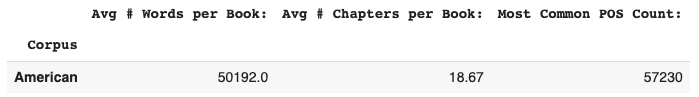

The average length of the books within my corpora are about 19 chapters, with a mean of 50,200 words.

## Data Model. 
*Describe the analytical tables you generated in the process of tokenization, annotation, and analysis of your corpus. You provide a list of tables with field names and their definition, along with URLs to each associated CSV file.*

## Exploration. 

*Describe each of your explorations, such as PCA and topic models. For each, include the relevant parameters and hyperparemeters used to generate each model and visualization. For your visualizations, you should use at least three (but likely more) of the following visualization types:*

*Hierarchical cluster diagrams*

*Heatmaps showing correlations*

*Scatter plots*

*KDE plots*

*Dispersion plots*

*t-SNE plots*

#### PCA

For the PCA, I needed to generate a bag of words and tfidf. The TFIDF table is an extension of an implied DOC table, where each doc is an observation (particularly a chapter in this case). PCA results in two tables: [loadings](https://github.com/Humairabh/DS5001FinalProject/blob/a11f204dde1c94c07d64c48649460213195c94b3/Data%20Files/american_loadings.csv) (language model) and [docs and components](https://github.com/Humairabh/DS5001FinalProject/blob/main/Data%20Files/american_components.csv) (which replaces the original document-term matrix with a reduced version). 

Part of the loadings table is shown below:
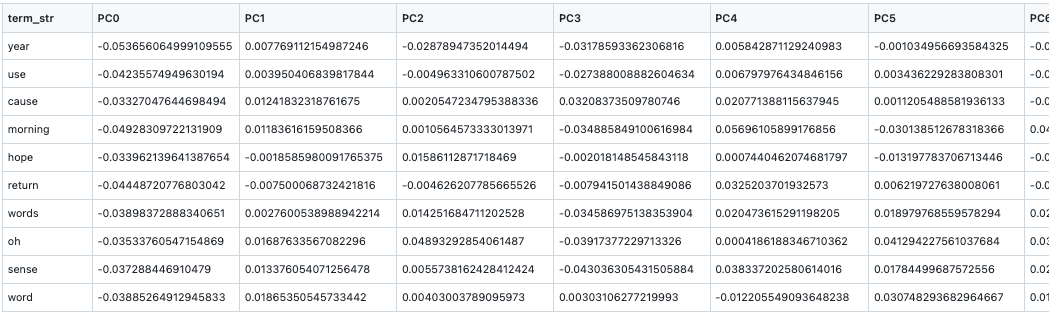
Part of the documents and components table is shown below:

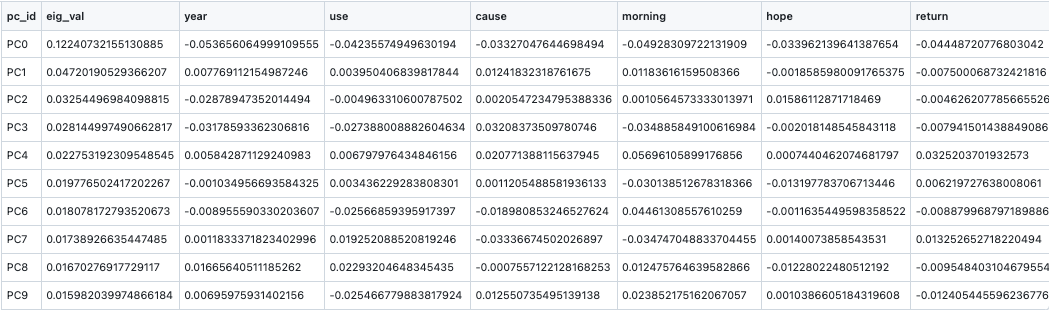

#### LDA

For topic models, I uses Scikit-Learn's CountVectorizer function to convert the F1 corpus into a document-term (aka DTM) vector space of word counts. From there, I could use Scikit-Learn's LatentDirichletAllocation algorithm to extract the [THETA](https://github.com/Humairabh/DS5001FinalProject/blob/a11f204dde1c94c07d64c48649460213195c94b3/Data%20Files/american_theta.csv) (doctopic where counts get normalized into PDFs) and [PHI](https://github.com/Humairabh/DS5001FinalProject/blob/a11f204dde1c94c07d64c48649460213195c94b3/Data%20Files/phi.csv) (topicword where counts get normalized into PDFs) tables. I also created a [TOPICS](https://github.com/Humairabh/DS5001FinalProject/blob/a11f204dde1c94c07d64c48649460213195c94b3/Data%20Files/topics.csv) table:
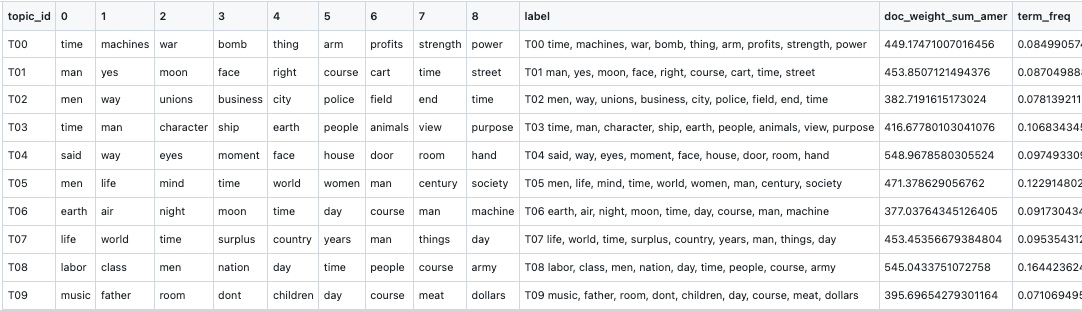

this table includes a list of the topics (0-8), most associated words by each topic, document weight and term frequency.

#### Word Embeddings (word2vec)

For word embeddings, it was necessary to import our TOKENS tables and generate a DOCS table for Gensim. Using Genim's word2vec function and the tsne engine, it was possible to vectorize terms into a semantic space and generate coordinates. As we've learned in lecture, the tsne function embodies a clustering method applied to high dimensional vectors, comparing pairwise similarities into probabilities. I set the parameters to vector_size=256, window=2, and min_count=50. 

#### Sentiment Analysis
For sentiment analysis, I needed to generate a [vocab sentiment table](https://github.com/Humairabh/DS5001FinalProject/blob/1c407da5b92ddfa01440cea50952d98bed9d5c6d/Data%20Files/vocab_sentiment.csv). I imported the Syuzhet.csv file which provided a table of words and their "sentiments". Our generated table incorporates dfidf, ifidf, syu_sentiment and weighted_sentiment. 

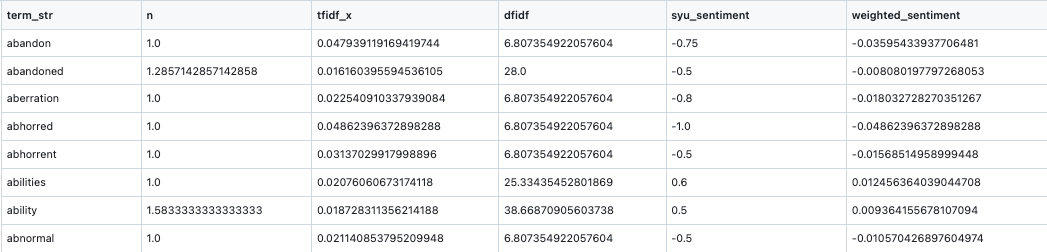

## Interpretation. 

*Provide your interpretation of the results of exploration, and any conclusion if you are comfortable making them.*

### PCA

Principle Component Analysis, or PCA, identifies and combines features with max variance. Firstly, I looked at PC0 Dispersion by book to see if there was clear differences in the spread:

#### PCA Dispersion Plot

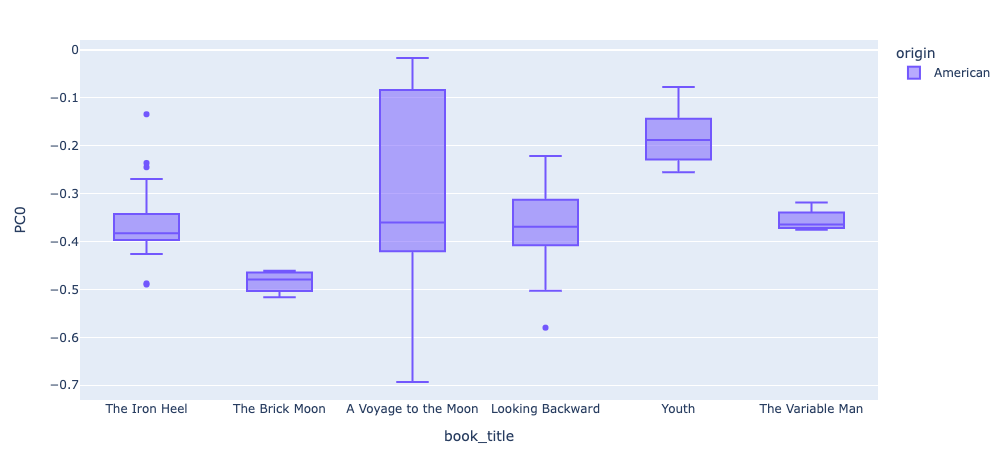

A Voyage to the Moon has a much larger range than the other books, whereas The Brick Moon and the Variable Man have a very small spread. Given outliers have a significant impact on the results of a PCA dispersion, it is suggestable that A Voyage to the Moon has a significant impact on our PCA results.

Next for PCA, I wanted to look at PC0-8 to see the differences in correlation by PC:

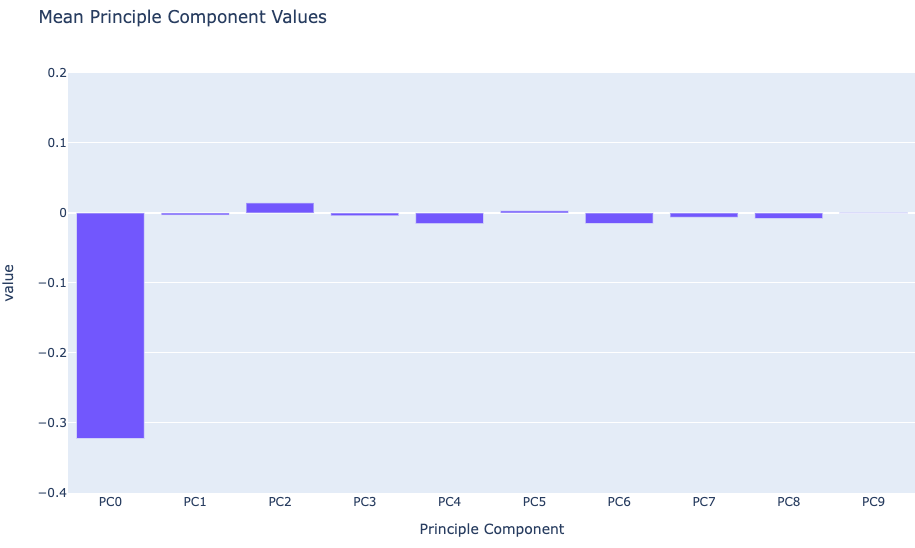

PC0 had a much stronger correlation than the PC's 1-8 which was pretty much what I expected to see. 

### LDA

The LDA model attempts to estimate probability distributions for topics in documents plus words in topics. LDA gives us THETA (distribution of topics over documents) and PHI (distribution of words over topics) tables. Firstly, we can see how our model grouped topics by weighting each document:

#### TOPICS by Doc Weight

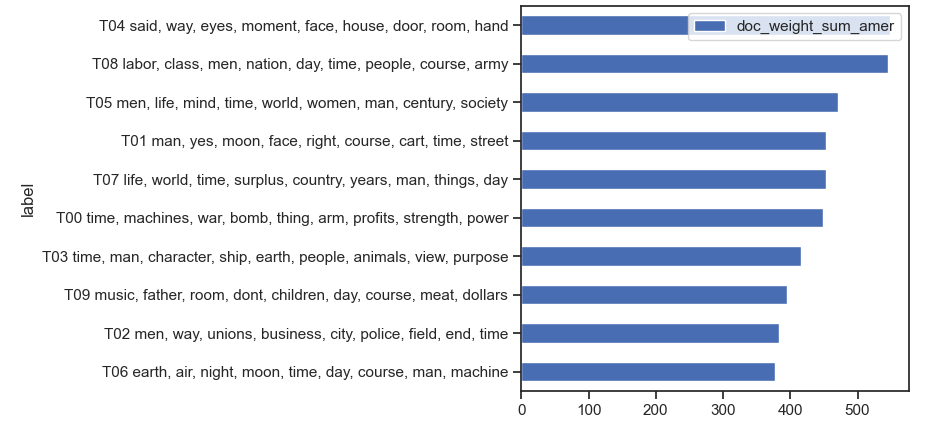

By looking at the doc weight of each topic, we can determine which topics are most strongly represented in the document. I noted that Topic 4 (said, ways, eyes, moment, face, house, door, room, hand) & Topic 8 (labor, class, men, nation, day, time, people, course, army) had the greatest document weight. This strong weight highlights the importance of these two topics in scifi. Now that we are able to understand the core terms of each topic, I wanted to see their term frequency by document weight:


#### TOPIC Doc Weight vs Term Freq

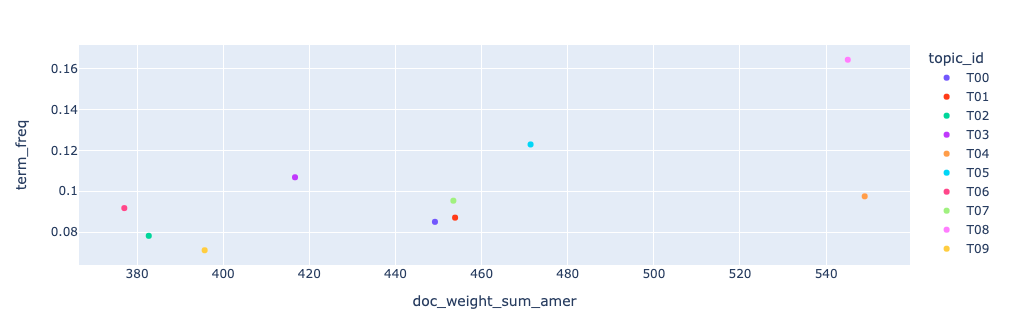

Analyzing term frequency allowed me to estimate the likelihood of the words within my topic to be important; plotting term frequency and document weight together gives a glimpse into the most important topics and words in my corpus. While Topic 4 wasn't as important for term frequency, Topic 8 definitively excelled in both metrics.

#### THETA Sample

Another method of LDA is to observe theta, my table which explores the relationships between documents and topics. Here, I took a sample of 20 of my OHCO paragraphs and illustrated a heatmap with THETA values:

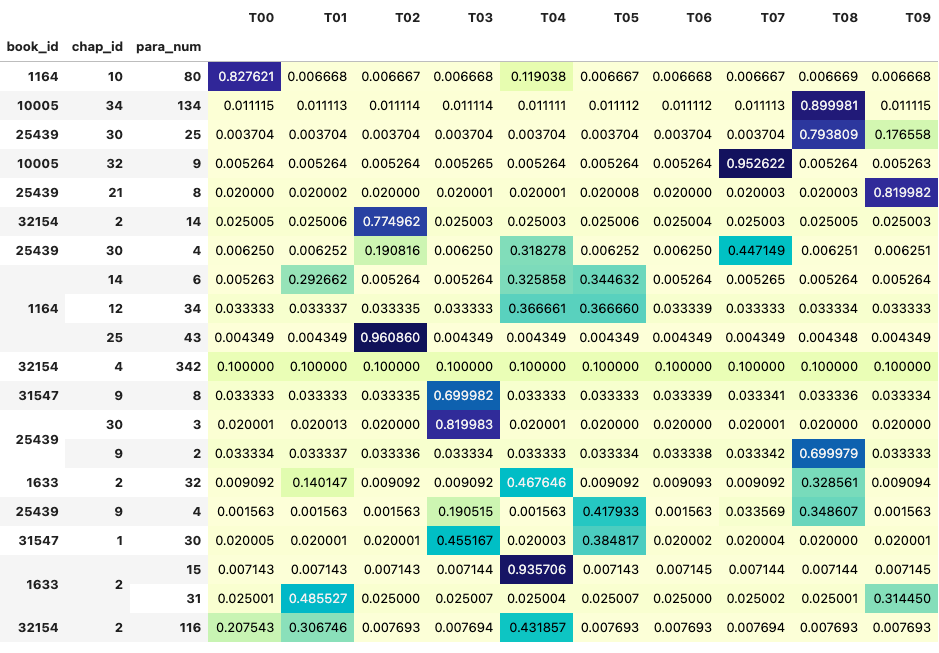

I was not surprised to see that Topic 8 had some stronger/more polar probabilities, whereas Topic 4 had a larger number of "lukewarm" 0.3 values than the other topics. 

### Word Embeddings

The process of word embeddings allow us to examine meanings independent of documents. As seen in lecture, word vectors are generated by a class of unsupervised algorithms in order to 'learn' the meanings of words from their embedded contexts. Using word2vec and my generated x/y coordinates, I was able to map vectors onto a semantic space, colored by POS tags:

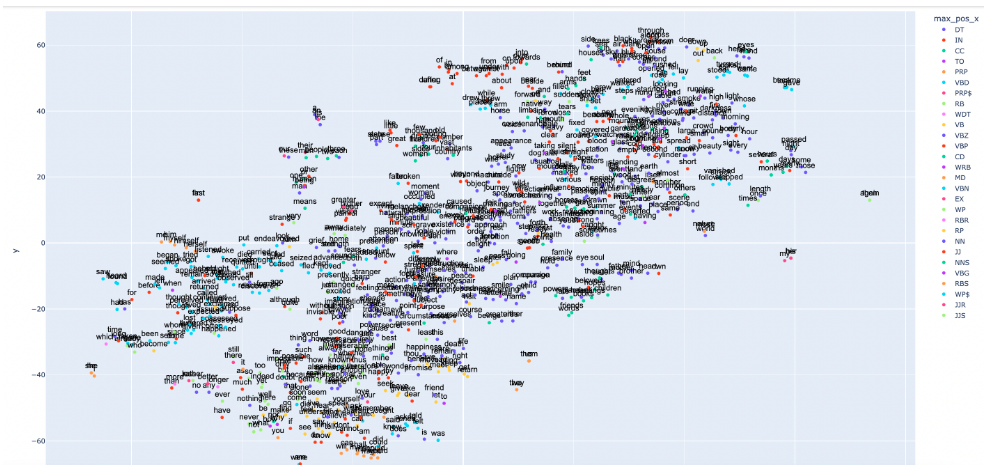

When mapping words, clustering and closeness between points suggests similar meaning.


### Sentiment Analysis 

Sentiment Analysis allows us to computationally observe "opinion, sentiment and subjectivity in text". Essentially, we can detect emotions and attitudes. However, Syuzhet sentiment analysis is unable to capture as much of the complexity in emotion. A sentiment score assigns "positive" or "negative" implications to terms, so I was able to plot the average sentiment of each of my novels:

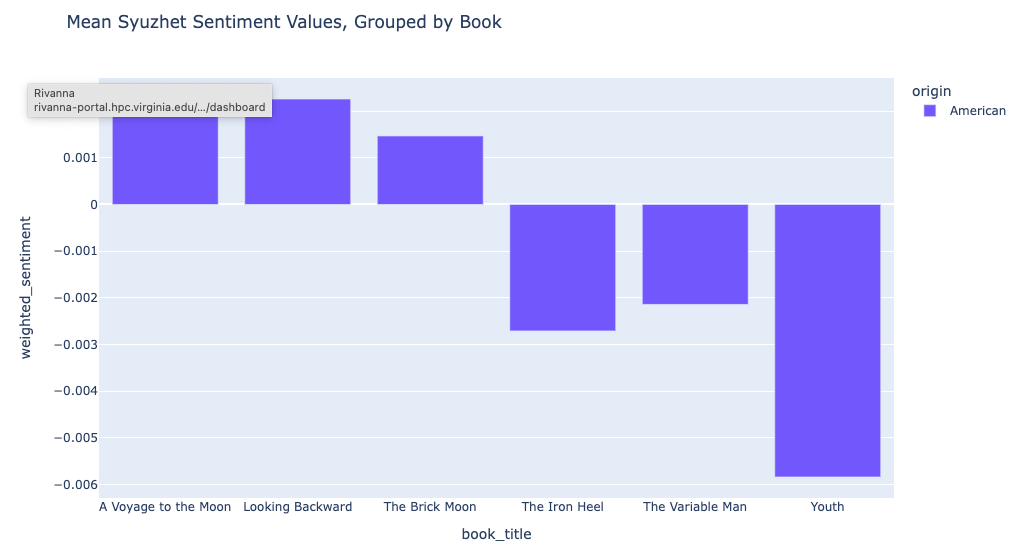

My corpus was evenly split between averaged positive and negative sentiments by book.

By performing the four different text analytics methods we learned in class, I was able to computationally analyze the 19th-20th century scifi genre as well as compare the books within it. PCA gave me some interesting results to compare the books in my corpus, and it singled out George Tucker's *A Voyage to the Moon* (1827). *A Voyage to the Moon* is regarded as earlier proto-scifi and social satire, so it is understandable why it's range is so much more wider and differing than that of the other novels in my corpus. 

Given that the LDA model outputted Topic 8 (labor, class, men, nation, day, time, people, course, army) to have the largest term frequency and document weight, my results for topic analysis suggest that these are the subjects which visionary scifi authors were thinking most about for society's future. These terms are strongly instutional which makes sense. These authors were very astute to consider how society, particularly nationhood, would maintain its structure. Coming out of the Industrial Revolution, it also makes sense that conversations surrounding class and labor were on their minds. The word "army" in this topic was also striking and suggests how power and nationhood is maintained by power and violence.

The Word2vec was a little more difficult to apply meaningful interpretations to for the sorts of questions I wanted to ask of my corpus, but it was interesting to see how words were clustered together. I could see elements of the body ('hands', 'eyes', etc) clustered together. One fascinating extention of Word Embedding is to capture analogies between words which would be a good idea for future work.

Lastly, I wondered why certain books were overall positive or negative in sentiment, and tie that to the synopsis of each book. According to Goodreads, In *A Voyage to the Moon* the narrator is shipwrecked off the coast of Burma, where he befriends a brahmin, who starts telling him of his trips to the moon using a space ship of his own invention. I can already imagine the whimsy albeit absurdity of this book, so it makes sense to me this one would have a positive overall tone. Next, Encyclopedia Brittanica describes *Looking Backward* as "an indictment of the capitalistic system and an imaginative picturing of a utopia achieved by a collectivist society in the year 2000". Achieving utopia is enough of a description to call this book a fairly optimistic one in the genre of scifi. Lastly for the positive books, *The Brick Moon* describes a retelling of a group of college friends who engineer the idea of a mechanism for more accurately telling longitude. Although there are setback and failures for these friends, the book frames their experience with joy, curiousity and fulfillment in their work. I understand why it's slightly less positive than the other two positive books.

For the negative books, *The Iron Heel* tells the story of a "20th century America that falls to a dictatorial oligarchy". This tied into our most important topic within our topic model: the words "nation" and "army" specifically in mind. *The Variable Man* discusses a similar idea of societal downfall. In the novel, "the human race has achieved space travel and begun to spread out from Earth, but is limited by an old and corrupt Centauran Empire, ruled from Proxima Centauri." This narrative is very similar to *the Iron Heel* in the sense of highlight corruption in governance and the crumbling of humankind as a result. Lastly with the most negative weighted sentiment, *Youth* narrates two boys who find two strange animals and capture them in attempt to put them in a circus; meanwhile, two professionals are tasked with the decision to open up their world to interstellar trade. *Youth* was the one book that surprised me for a negative sentiment. My guess is that some of the animals not surviving/succeeding in the book, coupled by the anxiety of the working professionals about the consequences of their decisions, gave this book a negative sentiment. 

## Resources.

Dropbox link: https://www.dropbox.com/scl/fo/vo4jx7bw8d0ybyiy9bhdm/h?dl=0&rlkey=u49a6y1hb67ic1nnypw554ahk

All code resourced from class labs and lecture: https://github.com/ontoligent/DS5001-2023-01-R

“Science Fiction.” Encyclopædia Britannica, Encyclopædia Britannica, Inc., 21 Apr. 2023, https://www.britannica.com/art/science-fiction. 